In [1]:
from rdkit import Chem
import sys
import os
import useful_rdkit_utils as uru
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt
import itertools
import pandas as pd
from collections import Counter
import mols2grid
from tdc.single_pred import ADME
from Filtering_functions import filter_molecules
import glob
import molvs
from multiprocessing import Pool, cpu_count
from tqdm import tqdm

In [2]:
# Get the current working directory
current_dir = os.getcwd()
print(current_dir)
# Get the parent directory
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
print(parent_dir)
# Add the parent directory to sys.path
sys.path.append(parent_dir)

/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/ChEMBL_clinical_smmolecules
/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model


Set the default image size

In [3]:
uru.rd_set_image_size(300,300)

### Reading the data from ChEMBL

In [4]:
sdf_files = glob.glob('/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/ChEMBL_clinical_smmolecules/*.sdf')

Add standardization during SMILES converting:

In [5]:
standardizer = molvs.standardize.Standardizer()

def standardize_mol(mol):
    try:
        mol = standardizer.standardize(mol)
        mol = standardizer.fragment_parent(mol, skip_standardize=True)
        mol = standardizer.tautomer_parent(mol, skip_standardize=True)
        mol = standardizer.isotope_parent(mol, skip_standardize=True)
        mol = standardizer.charge_parent(mol, skip_standardize=True)
        return mol
    except:
        return None

In [6]:
# Initialize an empty list to store SMILES and file names
data = []
counts = 0

# Loop over each SDF file
for sdf_file in sdf_files:
    # Read the SDF file
    supplier = Chem.SDMolSupplier(sdf_file)
    molecules = [mol for mol in supplier if mol is not None]
    
    # Extract SMILES from each molecule in the SDF file
    for mol in tqdm(molecules, desc=f"Processing {sdf_file}", unit="mol"):
        counts += 1
        mol = standardize_mol(mol)
        if mol is not None:
            smiles = Chem.MolToSmiles(mol)
            data.append({"File Name": sdf_file, "SMILES": smiles})
        else:
            print(f"Skipping molecule {sdf_file}")
            pass

### Make sure 1000 molecules are generated and calculated
print(counts)
len(data)

[16:47:19] WARNING: not removing hydrogen atom without neighbors
[16:47:19] WARNING: not removing hydrogen atom without neighbors
[16:47:19] WARNING: not removing hydrogen atom without neighbors
[16:47:20] WARNING: not removing hydrogen atom without neighbors
Processing /home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/ChEMBL_clinical_smmolecules/ChEMBL_clinical_smmolecules.sdf:   7%|▋         | 553/8236 [01:41<04:49, 26.58mol/s]  [16:49:02] Can't kekulize mol.  Unkekulized atoms: 3 15
[16:49:02] Can't kekulize mol.  Unkekulized atoms: 3 15
[16:49:02] Can't kekulize mol.  Unkekulized atoms: 3 15
Processing /home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/ChEMBL_clinical_smmolecules/ChEMBL_clinical_smmolecules.sdf:   7%|▋         | 596/8236 [01:44<13:22,  9.51mol/s][16:49:05] Explicit valence for atom # 6 C, 5, is greater than permitted
Processing /home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/ChEMBL_clinical_smmolecules

Skipping molecule /home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/ChEMBL_clinical_smmolecules/ChEMBL_clinical_smmolecules.sdf


Processing /home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/ChEMBL_clinical_smmolecules/ChEMBL_clinical_smmolecules.sdf:  20%|█▉        | 1644/8236 [07:09<41:55,  2.62mol/s]  [16:54:29] Explicit valence for atom # 0 C, 5, is greater than permitted
Processing /home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/ChEMBL_clinical_smmolecules/ChEMBL_clinical_smmolecules.sdf:  23%|██▎       | 1893/8236 [08:27<42:13,  2.50mol/s]  [16:55:47] Can't kekulize mol.  Unkekulized atoms: 3 14
[16:55:47] Can't kekulize mol.  Unkekulized atoms: 3 14
[16:55:47] Can't kekulize mol.  Unkekulized atoms: 3 14
Processing /home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/ChEMBL_clinical_smmolecules/ChEMBL_clinical_smmolecules.sdf:  24%|██▍       | 1984/8236 [08:50<44:57,  2.32mol/s]  [16:56:11] Can't kekulize mol.  Unkekulized atoms: 3 5
Processing /home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/ChEMBL_clinical_smmolecules/ChE

Skipping molecule /home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/ChEMBL_clinical_smmolecules/ChEMBL_clinical_smmolecules.sdf


Processing /home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/ChEMBL_clinical_smmolecules/ChEMBL_clinical_smmolecules.sdf:  95%|█████████▍| 7787/8236 [35:24<02:44,  2.72mol/s][17:22:45] Explicit valence for atom # 0 B, 5, is greater than permitted
Processing /home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/ChEMBL_clinical_smmolecules/ChEMBL_clinical_smmolecules.sdf:  95%|█████████▍| 7792/8236 [35:25<02:02,  3.63mol/s]

Skipping molecule /home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/ChEMBL_clinical_smmolecules/ChEMBL_clinical_smmolecules.sdf


Processing /home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/ChEMBL_clinical_smmolecules/ChEMBL_clinical_smmolecules.sdf: 100%|██████████| 8236/8236 [38:41<00:00,  3.55mol/s]

8236


8233

In [12]:
smi_list = [x['SMILES'] for x in data]
with open('ChEMBL_clinical_smmolecules.smi', 'w') as f:
    for item in smi_list:
        f.write("%s\n" % item)

Convert SMILES and name of them to a dataframe

In [13]:
df = pd.DataFrame(data)
df

File Name  \
0     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
1     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
2     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
3     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
4     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
...                                                 ...   
8228  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
8229  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
8230  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
8231  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
8232  /home/yang2531/Documents/Bo_toolbox/PatWalters...   

                                                 SMILES  
0            CN(C)CC1CCCCC1(O)c1cccc(OC(=O)c2ccccc2O)c1  
1     Cc1cc(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)NC3CCCCC3)c...  
2                        O=C1NC(=O)C2(c3ccc(Cl)cc3)CC12  
3      CC(C)C(=O)Oc1cc(OC(=O)C(C)C)cc(C(O)CNC(C)(C)C)c1  
4     CCOC(=O)C(Cc1c[nH]c2ccccc12)NC(=O)[C@@]1(O)[C@...  
...                                                 ...  
8228                     CC(C)(C)NCC(O)COc1cc(Cl)ccc1Cl  
8229  CCC[C@H](C)OC(=O)C(C)NP(=O)(OC[C@H]1OC[C@@H](n...  
8230        CCc1nc2c(=N)[nH]c3ccccc3c2n1CCCCNS(C)(=O)=O  
8231  CC[C@H]1[C@@H]2C[C@H]3[C@@H]4N(C)c5ccccc5[C@]4...  
8232  Cn1c(-c2ccccn2)c(C2CCCC2)c2ccc(C(=O)NC3(C(=O)N...  

[8233 rows x 2 columns]

Add an RDKit molecule to the dataframe

In [14]:
df['mol'] = df.SMILES.apply(Chem.MolFromSmiles)

Strip salts from the molecule

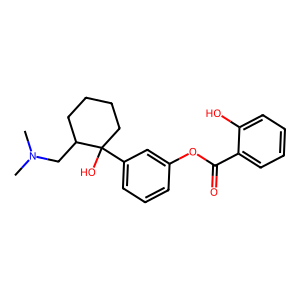

In [15]:
df.mol = df.mol.apply(uru.get_largest_fragment)
df.mol[0]

Instantiate a RingSystemFinder object and find ring systems for the molecules in df

In [16]:
ring_system_finder = uru.RingSystemFinder()
df['ring_sytems'] = df.mol.apply(ring_system_finder.find_ring_systems)
df.ring_sytems

0                          [C1CCCCC1, c1ccccc1, c1ccccc1]
1                           [c1cnoc1, c1ccccc1, C1CCCCC1]
2                            [O=C1NC(=O)C2CC12, c1ccccc1]
3                                              [c1ccccc1]
4       [c1ccc2[nH]ccc2c1, C1=C[C@H]2CC[C@@H]3Nc4ccccc...
                              ...                        
8228                                           [c1ccccc1]
8229            [C1COCO1, N=c1cc[nH]c(=O)[nH]1, c1ccccc1]
8230                        [N=c1[nH]c2ccccc2c2[nH]cnc12]
8231    [c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[C...
8232    [c1ccc2[nH]ccc2c1, c1ccncc1, C1CCCC1, C1CCC1, ...
Name: ring_sytems, Length: 8233, dtype: object

In [17]:
df.ring_sytems.values

array([list(['C1CCCCC1', 'c1ccccc1', 'c1ccccc1']),
       list(['c1cnoc1', 'c1ccccc1', 'C1CCCCC1']),
       list(['O=C1NC(=O)C2CC12', 'c1ccccc1']), ...,
       list(['N=c1[nH]c2ccccc2c2[nH]cnc12']),
       list(['c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[C@@]21C[C@H]43']),
       list(['c1ccc2[nH]ccc2c1', 'c1ccncc1', 'C1CCCC1', 'C1CCC1', 'c1ccccc1'])],
      dtype=object)

See how many times each ring system occurs

In [18]:
ring_system_list = list(itertools.chain.from_iterable(df.ring_sytems.values))
ring_count_df = pd.DataFrame(Counter(ring_system_list).items(),columns=["SMILES","Count"]) ### Convert a dictionary to a DataFrame.
ring_count_df.sort_values("Count",ascending=False,inplace=True)
ring_count_df

SMILES  Count
1                                              c1ccccc1   6383
21                                             c1ccncc1    678
33                                             C1CCNCC1    607
55                                             C1CNCCN1    482
72                                             C1CCOCC1    342
...                                                 ...    ...
1830  O=C1C=C[C@H]2[C@H]3CC[C@H]4C[C@H]4[C@@H]3[C@@H...      1
1815                                 N=c1nc2ccoc2c[nH]1      1
1816                                    c1cnc2c(c1)CCN2      1
1817                          O=c1c2ccccc2[nH]c2ccccc12      1
1818                                   O=[PH]1(=O)CCCO1      1

[1863 rows x 2 columns]

View the ring system frequencies

In [19]:
mols2grid.display(ring_count_df,subset=["img","Count"])

MolGridWidget()

The RingSystemLookup object has a dictionary of how many times each ring system occurs in the ChEMBL database.  We can use this object to evaluate the molecules in df.

In [20]:
ring_system_lookup = uru.RingSystemLookup()
res = df.mol.apply(ring_system_lookup.process_mol)

In [21]:
res

0       [(C1CCCCC1, 90332), (c1ccccc1, 2568039), (c1cc...
1       [(c1cnoc1, 36000), (c1ccccc1, 2568039), (C1CCC...
2           [(O=C1NC(=O)C2CC12, 56), (c1ccccc1, 2568039)]
3                                   [(c1ccccc1, 2568039)]
4       [(c1ccc2[nH]ccc2c1, 108866), (C1=C[C@H]2CC[C@@...
                              ...                        
8228                                [(c1ccccc1, 2568039)]
8229    [(C1COCO1, 2708), (N=c1cc[nH]c(=O)[nH]1, 222),...
8230                   [(N=c1[nH]c2ccccc2c2[nH]cnc12, 0)]
8231    [(c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[...
8232    [(c1ccc2[nH]ccc2c1, 108866), (c1ccncc1, 275595...
Name: mol, Length: 8233, dtype: object

In [22]:
df[['min_ring','min_freq']] = res.apply(uru.get_min_ring_frequency).tolist()
df

File Name  \
0     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
1     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
2     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
3     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
4     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
...                                                 ...   
8228  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
8229  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
8230  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
8231  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
8232  /home/yang2531/Documents/Bo_toolbox/PatWalters...   

                                                 SMILES  \
0            CN(C)CC1CCCCC1(O)c1cccc(OC(=O)c2ccccc2O)c1   
1     Cc1cc(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)NC3CCCCC3)c...   
2                        O=C1NC(=O)C2(c3ccc(Cl)cc3)CC12   
3      CC(C)C(=O)Oc1cc(OC(=O)C(C)C)cc(C(O)CNC(C)(C)C)c1   
4     CCOC(=O)C(Cc1c[nH]c2ccccc12)NC(=O)[C@@]1(O)[C@...   
...                                                 ...   
8228                     CC(C)(C)NCC(O)COc1cc(Cl)ccc1Cl   
8229  CCC[C@H](C)OC(=O)C(C)NP(=O)(OC[C@H]1OC[C@@H](n...   
8230        CCc1nc2c(=N)[nH]c3ccccc3c2n1CCCCNS(C)(=O)=O   
8231  CC[C@H]1[C@@H]2C[C@H]3[C@@H]4N(C)c5ccccc5[C@]4...   
8232  Cn1c(-c2ccccn2)c(C2CCCC2)c2ccc(C(=O)NC3(C(=O)N...   

                                                   mol  \
0     <rdkit.Chem.rdchem.Mol object at 0x794be8e07990>   
1     <rdkit.Chem.rdchem.Mol object at 0x794be8e077d0>   
2     <rdkit.Chem.rdchem.Mol object at 0x794be8e078b0>   
3     <rdkit.Chem.rdchem.Mol object at 0x794be8e07290>   
4     <rdkit.Chem.rdchem.Mol object at 0x794be8e074c0>   
...                                                ...   
8228  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d230>   
8229  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d2a0>   
8230  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d310>   
8231  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d380>   
8232  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d3f0>   

                                            ring_sytems  \
0                        [C1CCCCC1, c1ccccc1, c1ccccc1]   
1                         [c1cnoc1, c1ccccc1, C1CCCCC1]   
2                          [O=C1NC(=O)C2CC12, c1ccccc1]   
3                                            [c1ccccc1]   
4     [c1ccc2[nH]ccc2c1, C1=C[C@H]2CC[C@@H]3Nc4ccccc...   
...                                                 ...   
8228                                         [c1ccccc1]   
8229          [C1COCO1, N=c1cc[nH]c(=O)[nH]1, c1ccccc1]   
8230                      [N=c1[nH]c2ccccc2c2[nH]cnc12]   
8231  [c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[C...   
8232  [c1ccc2[nH]ccc2c1, c1ccncc1, C1CCCC1, C1CCC1, ...   

                                               min_ring min_freq  
0                                              C1CCCCC1    90332  
1                                               c1cnoc1    36000  
2                                      O=C1NC(=O)C2CC12       56  
3                                              c1ccccc1  2568039  
4               c1ccc2c3c([nH]c2c1)CC[C@@H]1CCCN(CC3)C1       81  
...                                                 ...      ...  
8228                                           c1ccccc1  2568039  
8229                               N=c1cc[nH]c(=O)[nH]1      222  
8230                        N=c1[nH]c2ccccc2c2[nH]cnc12        0  
8231  c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[C@...        1  
8232                                             C1CCC1    18342  

[8233 rows x 6 columns]

In [23]:
mols2grid.display(df.sort_values("min_freq"),mol_col="mol",subset=["img","min_freq"])

MolGridWidget()

### Check how many molecules are unique the ring frequency of them

How many molecules are unique using inChI?

In [24]:
df['inchi'] = df.mol.apply(Chem.MolToInchi)
df = df.drop_duplicates("inchi", keep="first", ignore_index=True)
df

[14:57:59] WARNING: Omitted undefined stereo

[14:57:59] WARNING: Omitted undefined stereo

[14:57:59] WARNING: Omitted undefined stereo

[14:57:59] WARNING: Omitted undefined stereo

[14:57:59] WARNING: Omitted undefined stereo

[14:57:59] WARNING: Omitted undefined stereo

[14:57:59] WARNING: Omitted undefined stereo

[14:57:59] WARNING: Omitted undefined stereo

[14:57:59] WARNING: Omitted undefined stereo

[14:57:59] WARNING: Omitted undefined stereo

[14:57:59] WARNING: Omitted undefined stereo

[14:57:59] WARNING: Omitted undefined stereo

[14:57:59] WARNING: Omitted undefined stereo

[14:57:59] WARNING: Omitted undefined stereo

[14:57:59] WARNING: Omitted undefined stereo

[14:57:59] WARNING: Charges were rearranged

[14:57:59] WARNING: Omitted undefined stereo

[14:57:59] WARNING: Omitted undefined stereo

[14:57:59] WARNING: Proton(s) added/removed

[14:57:59] WARNING: Omitted undefined stereo

[14:57:59] WARNING: Omitted undefined stereo

[14:57:59] WARNING: Omitted undefine

File Name  \
0     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
1     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
2     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
3     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
4     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
...                                                 ...   
7483  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7484  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7485  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7486  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7487  /home/yang2531/Documents/Bo_toolbox/PatWalters...   

                                                 SMILES  \
0            CN(C)CC1CCCCC1(O)c1cccc(OC(=O)c2ccccc2O)c1   
1     Cc1cc(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)NC3CCCCC3)c...   
2                        O=C1NC(=O)C2(c3ccc(Cl)cc3)CC12   
3      CC(C)C(=O)Oc1cc(OC(=O)C(C)C)cc(C(O)CNC(C)(C)C)c1   
4     CCOC(=O)C(Cc1c[nH]c2ccccc12)NC(=O)[C@@]1(O)[C@...   
...                                                 ...   
7483               CC(C)Cc1ccc(C(C)C(=O)NS(C)(=O)=O)cc1   
7484                     CC(C)(C)NCC(O)COc1cc(Cl)ccc1Cl   
7485        CCc1nc2c(=N)[nH]c3ccccc3c2n1CCCCNS(C)(=O)=O   
7486  CC[C@H]1[C@@H]2C[C@H]3[C@@H]4N(C)c5ccccc5[C@]4...   
7487  Cn1c(-c2ccccn2)c(C2CCCC2)c2ccc(C(=O)NC3(C(=O)N...   

                                                   mol  \
0     <rdkit.Chem.rdchem.Mol object at 0x794be8e07990>   
1     <rdkit.Chem.rdchem.Mol object at 0x794be8e077d0>   
2     <rdkit.Chem.rdchem.Mol object at 0x794be8e078b0>   
3     <rdkit.Chem.rdchem.Mol object at 0x794be8e07290>   
4     <rdkit.Chem.rdchem.Mol object at 0x794be8e074c0>   
...                                                ...   
7483  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d1c0>   
7484  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d230>   
7485  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d310>   
7486  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d380>   
7487  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d3f0>   

                                            ring_sytems  \
0                        [C1CCCCC1, c1ccccc1, c1ccccc1]   
1                         [c1cnoc1, c1ccccc1, C1CCCCC1]   
2                          [O=C1NC(=O)C2CC12, c1ccccc1]   
3                                            [c1ccccc1]   
4     [c1ccc2[nH]ccc2c1, C1=C[C@H]2CC[C@@H]3Nc4ccccc...   
...                                                 ...   
7483                                         [c1ccccc1]   
7484                                         [c1ccccc1]   
7485                      [N=c1[nH]c2ccccc2c2[nH]cnc12]   
7486  [c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[C...   
7487  [c1ccc2[nH]ccc2c1, c1ccncc1, C1CCCC1, C1CCC1, ...   

                                               min_ring min_freq  \
0                                              C1CCCCC1    90332   
1                                               c1cnoc1    36000   
2                                      O=C1NC(=O)C2CC12       56   
3                                              c1ccccc1  2568039   
4               c1ccc2c3c([nH]c2c1)CC[C@@H]1CCCN(CC3)C1       81   
...                                                 ...      ...   
7483                                           c1ccccc1  2568039   
7484                                           c1ccccc1  2568039   
7485                        N=c1[nH]c2ccccc2c2[nH]cnc12        0   
7486  c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[C@...        1   
7487                                             C1CCC1    18342   

                                                  inchi  
0     InChI=1S/C22H27NO4/c1-23(2)15-17-8-5-6-13-22(1...  
1     InChI=1S/C20H26N4O5S/c1-14-13-18(23-29-14)19(2...  
2     InChI=1S/C11H8ClNO2/c12-7-3-1-6(2-4-7)11-5-8(1...  
3     InChI=1S/C20H31NO5/c1-12(2)18(23)25-15-8-14(17...  
4     InChI=1S/C56H68N6O9/c1-7-52(67)28-33-29-55(51(...  
...                                                 ...  

How many of them have ring system?

In [25]:
df_ring = df[df.min_freq != -1]
df_ring

File Name  \
0     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
1     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
2     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
3     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
4     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
...                                                 ...   
7483  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7484  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7485  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7486  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7487  /home/yang2531/Documents/Bo_toolbox/PatWalters...   

                                                 SMILES  \
0            CN(C)CC1CCCCC1(O)c1cccc(OC(=O)c2ccccc2O)c1   
1     Cc1cc(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)NC3CCCCC3)c...   
2                        O=C1NC(=O)C2(c3ccc(Cl)cc3)CC12   
3      CC(C)C(=O)Oc1cc(OC(=O)C(C)C)cc(C(O)CNC(C)(C)C)c1   
4     CCOC(=O)C(Cc1c[nH]c2ccccc12)NC(=O)[C@@]1(O)[C@...   
...                                                 ...   
7483               CC(C)Cc1ccc(C(C)C(=O)NS(C)(=O)=O)cc1   
7484                     CC(C)(C)NCC(O)COc1cc(Cl)ccc1Cl   
7485        CCc1nc2c(=N)[nH]c3ccccc3c2n1CCCCNS(C)(=O)=O   
7486  CC[C@H]1[C@@H]2C[C@H]3[C@@H]4N(C)c5ccccc5[C@]4...   
7487  Cn1c(-c2ccccn2)c(C2CCCC2)c2ccc(C(=O)NC3(C(=O)N...   

                                                   mol  \
0     <rdkit.Chem.rdchem.Mol object at 0x794be8e07990>   
1     <rdkit.Chem.rdchem.Mol object at 0x794be8e077d0>   
2     <rdkit.Chem.rdchem.Mol object at 0x794be8e078b0>   
3     <rdkit.Chem.rdchem.Mol object at 0x794be8e07290>   
4     <rdkit.Chem.rdchem.Mol object at 0x794be8e074c0>   
...                                                ...   
7483  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d1c0>   
7484  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d230>   
7485  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d310>   
7486  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d380>   
7487  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d3f0>   

                                            ring_sytems  \
0                        [C1CCCCC1, c1ccccc1, c1ccccc1]   
1                         [c1cnoc1, c1ccccc1, C1CCCCC1]   
2                          [O=C1NC(=O)C2CC12, c1ccccc1]   
3                                            [c1ccccc1]   
4     [c1ccc2[nH]ccc2c1, C1=C[C@H]2CC[C@@H]3Nc4ccccc...   
...                                                 ...   
7483                                         [c1ccccc1]   
7484                                         [c1ccccc1]   
7485                      [N=c1[nH]c2ccccc2c2[nH]cnc12]   
7486  [c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[C...   
7487  [c1ccc2[nH]ccc2c1, c1ccncc1, C1CCCC1, C1CCC1, ...   

                                               min_ring min_freq  \
0                                              C1CCCCC1    90332   
1                                               c1cnoc1    36000   
2                                      O=C1NC(=O)C2CC12       56   
3                                              c1ccccc1  2568039   
4               c1ccc2c3c([nH]c2c1)CC[C@@H]1CCCN(CC3)C1       81   
...                                                 ...      ...   
7483                                           c1ccccc1  2568039   
7484                                           c1ccccc1  2568039   
7485                        N=c1[nH]c2ccccc2c2[nH]cnc12        0   
7486  c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[C@...        1   
7487                                             C1CCC1    18342   

                                                  inchi  
0     InChI=1S/C22H27NO4/c1-23(2)15-17-8-5-6-13-22(1...  
1     InChI=1S/C20H26N4O5S/c1-14-13-18(23-29-14)19(2...  
2     InChI=1S/C11H8ClNO2/c12-7-3-1-6(2-4-7)11-5-8(1...  
3     InChI=1S/C20H31NO5/c1-12(2)18(23)25-15-8-14(17...  
4     InChI=1S/C56H68N6O9/c1-7-52(67)28-33-29-55(51(...  
...                                                 ...  

In [26]:
filtered_df_ring_freq = df[df.min_freq > 100]
filtered_df_ring_freq

File Name  \
0     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
1     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
3     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
8     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
...                                                 ...   
7481  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7482  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7483  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7484  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7487  /home/yang2531/Documents/Bo_toolbox/PatWalters...   

                                                 SMILES  \
0            CN(C)CC1CCCCC1(O)c1cccc(OC(=O)c2ccccc2O)c1   
1     Cc1cc(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)NC3CCCCC3)c...   
3      CC(C)C(=O)Oc1cc(OC(=O)C(C)C)cc(C(O)CNC(C)(C)C)c1   
7                        O=C(O)CCCCc1ccc(CCCc2ccccc2)s1   
8      O=C(O[C@H]1CN2CCC1CC2)[C@@](CO)(c1ccccc1)n1ccnc1   
...                                                 ...   
7481                        CC(C)Cc1ccc(C(C)C(O)=NO)cc1   
7482  NC(=O)NC[C@@H]1CCCc2cc(S(=O)(=O)c3cccc(F)c3)ccc21   
7483               CC(C)Cc1ccc(C(C)C(=O)NS(C)(=O)=O)cc1   
7484                     CC(C)(C)NCC(O)COc1cc(Cl)ccc1Cl   
7487  Cn1c(-c2ccccn2)c(C2CCCC2)c2ccc(C(=O)NC3(C(=O)N...   

                                                   mol  \
0     <rdkit.Chem.rdchem.Mol object at 0x794be8e07990>   
1     <rdkit.Chem.rdchem.Mol object at 0x794be8e077d0>   
3     <rdkit.Chem.rdchem.Mol object at 0x794be8e07290>   
7     <rdkit.Chem.rdchem.Mol object at 0x794be8e07450>   
8     <rdkit.Chem.rdchem.Mol object at 0x794be8e07220>   
...                                                ...   
7481  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d070>   
7482  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d0e0>   
7483  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d1c0>   
7484  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d230>   
7487  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d3f0>   

                                            ring_sytems          min_ring  \
0                        [C1CCCCC1, c1ccccc1, c1ccccc1]          C1CCCCC1   
1                         [c1cnoc1, c1ccccc1, C1CCCCC1]           c1cnoc1   
3                                            [c1ccccc1]          c1ccccc1   
7                                   [c1ccsc1, c1ccccc1]           c1ccsc1   
8                  [C1CN2CCC1CC2, c1ccccc1, c1c[nH]cn1]      C1CN2CCC1CC2   
...                                                 ...               ...   
7481                                         [c1ccccc1]          c1ccccc1   
7482                       [c1ccc2c(c1)CCCC2, c1ccccc1]  c1ccc2c(c1)CCCC2   
7483                                         [c1ccccc1]          c1ccccc1   
7484                                         [c1ccccc1]          c1ccccc1   
7487  [c1ccc2[nH]ccc2c1, c1ccncc1, C1CCCC1, C1CCC1, ...            C1CCC1   

     min_freq                                              inchi  
0       90332  InChI=1S/C22H27NO4/c1-23(2)15-17-8-5-6-13-22(1...  
1       36000  InChI=1S/C20H26N4O5S/c1-14-13-18(23-29-14)19(2...  
3     2568039  InChI=1S/C20H31NO5/c1-12(2)18(23)25-15-8-14(17...  
7       80452  InChI=1S/C18H22O2S/c19-18(20)12-5-4-10-16-13-1...  
8        2824  InChI=1S/C19H23N3O3/c23-13-19(22-11-8-20-14-22...  
...       ...                                                ...  
7481  2568039  InChI=1S/C13H19NO2/c1-9(2)8-11-4-6-12(7-5-11)1...  
7482    10254  InChI=1S/C18H19FN2O3S/c19-14-5-2-6-15(10-14)25...  
7483  2568039  InChI=1S/C14H21NO3S/c1-10(2)9-12-5-7-13(8-6-12...  
7484  2568039  InChI=1S/C13H19Cl2NO2/c1-13(2,3)16-7-10(17)8-1...  
7487    18342  InChI=1S/C34H34N4O4/c1-38-28-21-24(13-16-26(28...  

[5163 rows x 7 columns]

### How many of them could pass PAINS filter?

Get a list of rules

In [27]:
reos = uru.REOS()
reos.get_available_rule_sets()

array(['Glaxo', 'Dundee', 'BMS', 'PAINS', 'SureChEMBL', 'MLSMR',
       'Inpharmatica', 'LINT'], dtype=object)

Get the currently active rule sets

In [28]:
reos.get_active_rule_sets()

array(['Glaxo'], dtype=object)

Set active rule set to PAINS

In [29]:
reos.set_active_rule_sets(['PAINS'])
reos.get_active_rule_sets()

array(['PAINS'], dtype=object)

Apply PAINS filter to unique mols

In [30]:
reos.pandas_mols(df.mol)

  0%|          | 0/7488 [00:00<?, ?it/s]

rule_set_name description
0               ok          ok
1               ok          ok
2               ok          ok
3               ok          ok
4               ok          ok
...            ...         ...
7483            ok          ok
7484            ok          ok
7485            ok          ok
7486            ok          ok
7487            ok          ok

[7488 rows x 2 columns]

In [31]:
df_PAINS_filter = pd.concat([df, reos.pandas_mols(df.mol)], axis=1)
df_PAINS_filter = df_PAINS_filter[df_PAINS_filter.description == 'ok']
df_PAINS_filter

  0%|          | 0/7488 [00:00<?, ?it/s]

File Name  \
0     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
1     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
2     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
3     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
4     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
...                                                 ...   
7483  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7484  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7485  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7486  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7487  /home/yang2531/Documents/Bo_toolbox/PatWalters...   

                                                 SMILES  \
0            CN(C)CC1CCCCC1(O)c1cccc(OC(=O)c2ccccc2O)c1   
1     Cc1cc(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)NC3CCCCC3)c...   
2                        O=C1NC(=O)C2(c3ccc(Cl)cc3)CC12   
3      CC(C)C(=O)Oc1cc(OC(=O)C(C)C)cc(C(O)CNC(C)(C)C)c1   
4     CCOC(=O)C(Cc1c[nH]c2ccccc12)NC(=O)[C@@]1(O)[C@...   
...                                                 ...   
7483               CC(C)Cc1ccc(C(C)C(=O)NS(C)(=O)=O)cc1   
7484                     CC(C)(C)NCC(O)COc1cc(Cl)ccc1Cl   
7485        CCc1nc2c(=N)[nH]c3ccccc3c2n1CCCCNS(C)(=O)=O   
7486  CC[C@H]1[C@@H]2C[C@H]3[C@@H]4N(C)c5ccccc5[C@]4...   
7487  Cn1c(-c2ccccn2)c(C2CCCC2)c2ccc(C(=O)NC3(C(=O)N...   

                                                   mol  \
0     <rdkit.Chem.rdchem.Mol object at 0x794be8e07990>   
1     <rdkit.Chem.rdchem.Mol object at 0x794be8e077d0>   
2     <rdkit.Chem.rdchem.Mol object at 0x794be8e078b0>   
3     <rdkit.Chem.rdchem.Mol object at 0x794be8e07290>   
4     <rdkit.Chem.rdchem.Mol object at 0x794be8e074c0>   
...                                                ...   
7483  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d1c0>   
7484  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d230>   
7485  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d310>   
7486  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d380>   
7487  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d3f0>   

                                            ring_sytems  \
0                        [C1CCCCC1, c1ccccc1, c1ccccc1]   
1                         [c1cnoc1, c1ccccc1, C1CCCCC1]   
2                          [O=C1NC(=O)C2CC12, c1ccccc1]   
3                                            [c1ccccc1]   
4     [c1ccc2[nH]ccc2c1, C1=C[C@H]2CC[C@@H]3Nc4ccccc...   
...                                                 ...   
7483                                         [c1ccccc1]   
7484                                         [c1ccccc1]   
7485                      [N=c1[nH]c2ccccc2c2[nH]cnc12]   
7486  [c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[C...   
7487  [c1ccc2[nH]ccc2c1, c1ccncc1, C1CCCC1, C1CCC1, ...   

                                               min_ring min_freq  \
0                                              C1CCCCC1    90332   
1                                               c1cnoc1    36000   
2                                      O=C1NC(=O)C2CC12       56   
3                                              c1ccccc1  2568039   
4               c1ccc2c3c([nH]c2c1)CC[C@@H]1CCCN(CC3)C1       81   
...                                                 ...      ...   
7483                                           c1ccccc1  2568039   
7484                                           c1ccccc1  2568039   
7485                        N=c1[nH]c2ccccc2c2[nH]cnc12        0   
7486  c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[C@...        1   
7487                                             C1CCC1    18342   

                                                  inchi rule_set_name  \
0     InChI=1S/C22H27NO4/c1-23(2)15-17-8-5-6-13-22(1...            ok   
1     InChI=1S/C20H26N4O5S/c1-14-13-18(23-29-14)19(2...            ok   
2     InChI=1S/C11H8ClNO2/c12-7-3-1-6(2-4-7)11-5-8(1...            ok   
3     InChI=1S/C20H31NO5/c1-12(2)18(23)25-15-8-14(17...            ok   
4     InChI=1S/C56H68N6O9/c1-7-52(67)28-

Test all filters from rd_filters

In [32]:
rd_filters = ['Glaxo', 'Dundee', 'BMS', 'SureChEMBL', 'MLSMR', 'Inpharmatica', 'LINT']
for filter in rd_filters:
    reos.set_active_rule_sets([filter])
    new_df = reos.pandas_mols(df.mol)
    print(filter, len(new_df[new_df.description == "ok"])/len(new_df), reos.get_active_rule_sets(), len(new_df[new_df.description == "ok"]))

  0%|          | 0/7488 [00:00<?, ?it/s]

Glaxo 0.8981036324786325 ['Glaxo'] 6725


  0%|          | 0/7488 [00:00<?, ?it/s]

Dundee 0.5261752136752137 ['Dundee'] 3940


  0%|          | 0/7488 [00:00<?, ?it/s]

BMS 0.8354700854700855 ['BMS'] 6256


  0%|          | 0/7488 [00:00<?, ?it/s]

SureChEMBL 0.7542735042735043 ['SureChEMBL'] 5648


  0%|          | 0/7488 [00:00<?, ?it/s]

MLSMR 0.4655448717948718 ['MLSMR'] 3486


  0%|          | 0/7488 [00:00<?, ?it/s]

Inpharmatica 0.7395833333333334 ['Inpharmatica'] 5538


  0%|          | 0/7488 [00:00<?, ?it/s]

LINT 0.6155181623931624 ['LINT'] 4609


### How many of them could pass filters suggested by Dr.Reymond?

In [33]:
df['Reymond'] = df.mol.apply(filter_molecules)
df

File Name  \
0     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
1     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
2     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
3     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
4     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
...                                                 ...   
7483  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7484  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7485  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7486  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7487  /home/yang2531/Documents/Bo_toolbox/PatWalters...   

                                                 SMILES  \
0            CN(C)CC1CCCCC1(O)c1cccc(OC(=O)c2ccccc2O)c1   
1     Cc1cc(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)NC3CCCCC3)c...   
2                        O=C1NC(=O)C2(c3ccc(Cl)cc3)CC12   
3      CC(C)C(=O)Oc1cc(OC(=O)C(C)C)cc(C(O)CNC(C)(C)C)c1   
4     CCOC(=O)C(Cc1c[nH]c2ccccc12)NC(=O)[C@@]1(O)[C@...   
...                                                 ...   
7483               CC(C)Cc1ccc(C(C)C(=O)NS(C)(=O)=O)cc1   
7484                     CC(C)(C)NCC(O)COc1cc(Cl)ccc1Cl   
7485        CCc1nc2c(=N)[nH]c3ccccc3c2n1CCCCNS(C)(=O)=O   
7486  CC[C@H]1[C@@H]2C[C@H]3[C@@H]4N(C)c5ccccc5[C@]4...   
7487  Cn1c(-c2ccccn2)c(C2CCCC2)c2ccc(C(=O)NC3(C(=O)N...   

                                                   mol  \
0     <rdkit.Chem.rdchem.Mol object at 0x794be8e07990>   
1     <rdkit.Chem.rdchem.Mol object at 0x794be8e077d0>   
2     <rdkit.Chem.rdchem.Mol object at 0x794be8e078b0>   
3     <rdkit.Chem.rdchem.Mol object at 0x794be8e07290>   
4     <rdkit.Chem.rdchem.Mol object at 0x794be8e074c0>   
...                                                ...   
7483  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d1c0>   
7484  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d230>   
7485  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d310>   
7486  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d380>   
7487  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d3f0>   

                                            ring_sytems  \
0                        [C1CCCCC1, c1ccccc1, c1ccccc1]   
1                         [c1cnoc1, c1ccccc1, C1CCCCC1]   
2                          [O=C1NC(=O)C2CC12, c1ccccc1]   
3                                            [c1ccccc1]   
4     [c1ccc2[nH]ccc2c1, C1=C[C@H]2CC[C@@H]3Nc4ccccc...   
...                                                 ...   
7483                                         [c1ccccc1]   
7484                                         [c1ccccc1]   
7485                      [N=c1[nH]c2ccccc2c2[nH]cnc12]   
7486  [c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[C...   
7487  [c1ccc2[nH]ccc2c1, c1ccncc1, C1CCCC1, C1CCC1, ...   

                                               min_ring min_freq  \
0                                              C1CCCCC1    90332   
1                                               c1cnoc1    36000   
2                                      O=C1NC(=O)C2CC12       56   
3                                              c1ccccc1  2568039   
4               c1ccc2c3c([nH]c2c1)CC[C@@H]1CCCN(CC3)C1       81   
...                                                 ...      ...   
7483                                           c1ccccc1  2568039   
7484                                           c1ccccc1  2568039   
7485                        N=c1[nH]c2ccccc2c2[nH]cnc12        0   
7486  c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[C@...        1   
7487                                             C1CCC1    18342   

                                                  inchi  Reymond  
0     InChI=1S/C22H27NO4/c1-23(2)15-17-8-5-6-13-22(1...     True  
1     InChI=1S/C20H26N4O5S/c1-14-13-18(23-29-14)19(2...     True  
2     InChI=1S/C11H8ClNO2/c12-7-3-1-6(2-4-7)11-5-8(1...     True  
3     InChI=1S/C20H31NO5/c1-12(2)18(23)25-15-8-14(17...     True  
4     InChI=1S/C56H68N6O9/c1-7-52(67)28-33-29-55(51(...     True  
...

In [34]:
df_Reymond_filter = df[df.Reymond == True]
df_Reymond_filter

File Name  \
0     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
1     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
2     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
3     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
4     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
...                                                 ...   
7483  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7484  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7485  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7486  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7487  /home/yang2531/Documents/Bo_toolbox/PatWalters...   

                                                 SMILES  \
0            CN(C)CC1CCCCC1(O)c1cccc(OC(=O)c2ccccc2O)c1   
1     Cc1cc(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)NC3CCCCC3)c...   
2                        O=C1NC(=O)C2(c3ccc(Cl)cc3)CC12   
3      CC(C)C(=O)Oc1cc(OC(=O)C(C)C)cc(C(O)CNC(C)(C)C)c1   
4     CCOC(=O)C(Cc1c[nH]c2ccccc12)NC(=O)[C@@]1(O)[C@...   
...                                                 ...   
7483               CC(C)Cc1ccc(C(C)C(=O)NS(C)(=O)=O)cc1   
7484                     CC(C)(C)NCC(O)COc1cc(Cl)ccc1Cl   
7485        CCc1nc2c(=N)[nH]c3ccccc3c2n1CCCCNS(C)(=O)=O   
7486  CC[C@H]1[C@@H]2C[C@H]3[C@@H]4N(C)c5ccccc5[C@]4...   
7487  Cn1c(-c2ccccn2)c(C2CCCC2)c2ccc(C(=O)NC3(C(=O)N...   

                                                   mol  \
0     <rdkit.Chem.rdchem.Mol object at 0x794be8e07990>   
1     <rdkit.Chem.rdchem.Mol object at 0x794be8e077d0>   
2     <rdkit.Chem.rdchem.Mol object at 0x794be8e078b0>   
3     <rdkit.Chem.rdchem.Mol object at 0x794be8e07290>   
4     <rdkit.Chem.rdchem.Mol object at 0x794be8e074c0>   
...                                                ...   
7483  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d1c0>   
7484  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d230>   
7485  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d310>   
7486  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d380>   
7487  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d3f0>   

                                            ring_sytems  \
0                        [C1CCCCC1, c1ccccc1, c1ccccc1]   
1                         [c1cnoc1, c1ccccc1, C1CCCCC1]   
2                          [O=C1NC(=O)C2CC12, c1ccccc1]   
3                                            [c1ccccc1]   
4     [c1ccc2[nH]ccc2c1, C1=C[C@H]2CC[C@@H]3Nc4ccccc...   
...                                                 ...   
7483                                         [c1ccccc1]   
7484                                         [c1ccccc1]   
7485                      [N=c1[nH]c2ccccc2c2[nH]cnc12]   
7486  [c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[C...   
7487  [c1ccc2[nH]ccc2c1, c1ccncc1, C1CCCC1, C1CCC1, ...   

                                               min_ring min_freq  \
0                                              C1CCCCC1    90332   
1                                               c1cnoc1    36000   
2                                      O=C1NC(=O)C2CC12       56   
3                                              c1ccccc1  2568039   
4               c1ccc2c3c([nH]c2c1)CC[C@@H]1CCCN(CC3)C1       81   
...                                                 ...      ...   
7483                                           c1ccccc1  2568039   
7484                                           c1ccccc1  2568039   
7485                        N=c1[nH]c2ccccc2c2[nH]cnc12        0   
7486  c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[C@...        1   
7487                                             C1CCC1    18342   

                                                  inchi  Reymond  
0     InChI=1S/C22H27NO4/c1-23(2)15-17-8-5-6-13-22(1...     True  
1     InChI=1S/C20H26N4O5S/c1-14-13-18(23-29-14)19(2...     True  
2     InChI=1S/C11H8ClNO2/c12-7-3-1-6(2-4-7)11-5-8(1...     True  
3     InChI=1S/C20H31NO5/c1-12(2)18(23)25-15-8-14(17...     True  
4     InChI=1S/C56H68N6O9/c1-7-52(67)28-33-29-55(51(...     True  
...

### How many of them could pass RO5?

In [35]:
def passes_rule_of_five(smiles):
    """Determine if a molecule passes Lipinski's Rule of Five."""
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        hbd = Descriptors.NumHDonors(mol)  # Hydrogen bond donors
        hba = Descriptors.NumHAcceptors(mol)  # Hydrogen bond acceptors
        mw = Descriptors.MolWt(mol)  # Molecular weight
        logp = Descriptors.MolLogP(mol)  # LogP
        
        # Check Lipinski's Rule of Five criteria
        if hbd <= 5 and hba <= 10 and mw <= 500 and logp <= 5:
            return True
    return False

df['Lipinski'] = df.SMILES.apply(passes_rule_of_five)
df

File Name  \
0     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
1     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
2     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
3     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
4     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
...                                                 ...   
7483  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7484  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7485  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7486  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7487  /home/yang2531/Documents/Bo_toolbox/PatWalters...   

                                                 SMILES  \
0            CN(C)CC1CCCCC1(O)c1cccc(OC(=O)c2ccccc2O)c1   
1     Cc1cc(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)NC3CCCCC3)c...   
2                        O=C1NC(=O)C2(c3ccc(Cl)cc3)CC12   
3      CC(C)C(=O)Oc1cc(OC(=O)C(C)C)cc(C(O)CNC(C)(C)C)c1   
4     CCOC(=O)C(Cc1c[nH]c2ccccc12)NC(=O)[C@@]1(O)[C@...   
...                                                 ...   
7483               CC(C)Cc1ccc(C(C)C(=O)NS(C)(=O)=O)cc1   
7484                     CC(C)(C)NCC(O)COc1cc(Cl)ccc1Cl   
7485        CCc1nc2c(=N)[nH]c3ccccc3c2n1CCCCNS(C)(=O)=O   
7486  CC[C@H]1[C@@H]2C[C@H]3[C@@H]4N(C)c5ccccc5[C@]4...   
7487  Cn1c(-c2ccccn2)c(C2CCCC2)c2ccc(C(=O)NC3(C(=O)N...   

                                                   mol  \
0     <rdkit.Chem.rdchem.Mol object at 0x794be8e07990>   
1     <rdkit.Chem.rdchem.Mol object at 0x794be8e077d0>   
2     <rdkit.Chem.rdchem.Mol object at 0x794be8e078b0>   
3     <rdkit.Chem.rdchem.Mol object at 0x794be8e07290>   
4     <rdkit.Chem.rdchem.Mol object at 0x794be8e074c0>   
...                                                ...   
7483  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d1c0>   
7484  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d230>   
7485  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d310>   
7486  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d380>   
7487  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d3f0>   

                                            ring_sytems  \
0                        [C1CCCCC1, c1ccccc1, c1ccccc1]   
1                         [c1cnoc1, c1ccccc1, C1CCCCC1]   
2                          [O=C1NC(=O)C2CC12, c1ccccc1]   
3                                            [c1ccccc1]   
4     [c1ccc2[nH]ccc2c1, C1=C[C@H]2CC[C@@H]3Nc4ccccc...   
...                                                 ...   
7483                                         [c1ccccc1]   
7484                                         [c1ccccc1]   
7485                      [N=c1[nH]c2ccccc2c2[nH]cnc12]   
7486  [c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[C...   
7487  [c1ccc2[nH]ccc2c1, c1ccncc1, C1CCCC1, C1CCC1, ...   

                                               min_ring min_freq  \
0                                              C1CCCCC1    90332   
1                                               c1cnoc1    36000   
2                                      O=C1NC(=O)C2CC12       56   
3                                              c1ccccc1  2568039   
4               c1ccc2c3c([nH]c2c1)CC[C@@H]1CCCN(CC3)C1       81   
...                                                 ...      ...   
7483                                           c1ccccc1  2568039   
7484                                           c1ccccc1  2568039   
7485                        N=c1[nH]c2ccccc2c2[nH]cnc12        0   
7486  c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[C@...        1   
7487                                             C1CCC1    18342   

                                                  inchi  Reymond  Lipinski  
0     InChI=1S/C22H27NO4/c1-23(2)15-17-8-5-6-13-22(1...     True      True  
1     InChI=1S/C20H26N4O5S/c1-14-13-18(23-29-14)19(2...     True      True  
2     InChI=1S/C11H8ClNO2/c12-7-3-1-6(2-4-7)11-5-8(1...     True      True  
3     InChI=1S/C20H31NO5/c1-12(2)18(23)25-15-8-14(17...     True      True  
4     InChI=1S/C56H6

In [36]:
df_Lipinski_filter = df[df.Lipinski == True]
df_Lipinski_filter

File Name  \
0     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
1     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
2     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
3     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
...                                                 ...   
7482  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7483  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7484  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7485  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7486  /home/yang2531/Documents/Bo_toolbox/PatWalters...   

                                                 SMILES  \
0            CN(C)CC1CCCCC1(O)c1cccc(OC(=O)c2ccccc2O)c1   
1     Cc1cc(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)NC3CCCCC3)c...   
2                        O=C1NC(=O)C2(c3ccc(Cl)cc3)CC12   
3      CC(C)C(=O)Oc1cc(OC(=O)C(C)C)cc(C(O)CNC(C)(C)C)c1   
7                        O=C(O)CCCCc1ccc(CCCc2ccccc2)s1   
...                                                 ...   
7482  NC(=O)NC[C@@H]1CCCc2cc(S(=O)(=O)c3cccc(F)c3)ccc21   
7483               CC(C)Cc1ccc(C(C)C(=O)NS(C)(=O)=O)cc1   
7484                     CC(C)(C)NCC(O)COc1cc(Cl)ccc1Cl   
7485        CCc1nc2c(=N)[nH]c3ccccc3c2n1CCCCNS(C)(=O)=O   
7486  CC[C@H]1[C@@H]2C[C@H]3[C@@H]4N(C)c5ccccc5[C@]4...   

                                                   mol  \
0     <rdkit.Chem.rdchem.Mol object at 0x794be8e07990>   
1     <rdkit.Chem.rdchem.Mol object at 0x794be8e077d0>   
2     <rdkit.Chem.rdchem.Mol object at 0x794be8e078b0>   
3     <rdkit.Chem.rdchem.Mol object at 0x794be8e07290>   
7     <rdkit.Chem.rdchem.Mol object at 0x794be8e07450>   
...                                                ...   
7482  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d0e0>   
7483  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d1c0>   
7484  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d230>   
7485  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d310>   
7486  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d380>   

                                            ring_sytems  \
0                        [C1CCCCC1, c1ccccc1, c1ccccc1]   
1                         [c1cnoc1, c1ccccc1, C1CCCCC1]   
2                          [O=C1NC(=O)C2CC12, c1ccccc1]   
3                                            [c1ccccc1]   
7                                   [c1ccsc1, c1ccccc1]   
...                                                 ...   
7482                       [c1ccc2c(c1)CCCC2, c1ccccc1]   
7483                                         [c1ccccc1]   
7484                                         [c1ccccc1]   
7485                      [N=c1[nH]c2ccccc2c2[nH]cnc12]   
7486  [c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[C...   

                                               min_ring min_freq  \
0                                              C1CCCCC1    90332   
1                                               c1cnoc1    36000   
2                                      O=C1NC(=O)C2CC12       56   
3                                              c1ccccc1  2568039   
7                                               c1ccsc1    80452   
...                                                 ...      ...   
7482                                   c1ccc2c(c1)CCCC2    10254   
7483                                           c1ccccc1  2568039   
7484                                           c1ccccc1  2568039   
7485                        N=c1[nH]c2ccccc2c2[nH]cnc12        0   
7486  c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[C@...        1   

                                                  inchi  Reymond  Lipinski  
0     InChI=1S/C22H27NO4/c1-23(2)15-17-8-5-6-13-22(1...     True      True  
1     InChI=1S/C20H26N4O5S/c1-14-13-18(23-29-14)19(2...     True      True  
2     InChI=1S/C11H8ClNO2/c12-7-3-1-6(2-4-7)11-5-8(1...     True      True  
3     InChI=1S/C20H31NO5/c1-12(2)18(23)25-15-8-14(17...     True      True  
7     InChI=1S/C18H2

### Molecules' performance in ring systems from ZINC22 database

In [37]:
ring_system_lookup_ZINC22 = uru.RingSystemLookup(ring_file="/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/data/ZINC22_rings_system.csv")
res_zinc22 = df.mol.apply(ring_system_lookup_ZINC22.process_mol)
res_zinc22

0       [(C1CCCCC1, 4295567520), (c1ccccc1, 2124353875...
1       [(c1cnoc1, 2695794066), (c1ccccc1, 21243538754...
2       [(O=C1NC(=O)C2CC12, 1836), (c1ccccc1, 21243538...
3                               [(c1ccccc1, 21243538754)]
4       [(c1ccc2[nH]ccc2c1, 616349280), (C1=C[C@H]2CC[...
                              ...                        
7483                            [(c1ccccc1, 21243538754)]
7484                            [(c1ccccc1, 21243538754)]
7485                [(N=c1[nH]c2ccccc2c2[nH]cnc12, 2560)]
7486    [(c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[...
7487    [(c1ccc2[nH]ccc2c1, 616349280), (c1ccncc1, 997...
Name: mol, Length: 7488, dtype: object

In [38]:
df[['min_ring','min_freq']] = res_zinc22.apply(uru.get_min_ring_frequency).tolist()
df

File Name  \
0     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
1     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
2     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
3     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
4     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
...                                                 ...   
7483  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7484  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7485  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7486  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7487  /home/yang2531/Documents/Bo_toolbox/PatWalters...   

                                                 SMILES  \
0            CN(C)CC1CCCCC1(O)c1cccc(OC(=O)c2ccccc2O)c1   
1     Cc1cc(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)NC3CCCCC3)c...   
2                        O=C1NC(=O)C2(c3ccc(Cl)cc3)CC12   
3      CC(C)C(=O)Oc1cc(OC(=O)C(C)C)cc(C(O)CNC(C)(C)C)c1   
4     CCOC(=O)C(Cc1c[nH]c2ccccc12)NC(=O)[C@@]1(O)[C@...   
...                                                 ...   
7483               CC(C)Cc1ccc(C(C)C(=O)NS(C)(=O)=O)cc1   
7484                     CC(C)(C)NCC(O)COc1cc(Cl)ccc1Cl   
7485        CCc1nc2c(=N)[nH]c3ccccc3c2n1CCCCNS(C)(=O)=O   
7486  CC[C@H]1[C@@H]2C[C@H]3[C@@H]4N(C)c5ccccc5[C@]4...   
7487  Cn1c(-c2ccccn2)c(C2CCCC2)c2ccc(C(=O)NC3(C(=O)N...   

                                                   mol  \
0     <rdkit.Chem.rdchem.Mol object at 0x794be8e07990>   
1     <rdkit.Chem.rdchem.Mol object at 0x794be8e077d0>   
2     <rdkit.Chem.rdchem.Mol object at 0x794be8e078b0>   
3     <rdkit.Chem.rdchem.Mol object at 0x794be8e07290>   
4     <rdkit.Chem.rdchem.Mol object at 0x794be8e074c0>   
...                                                ...   
7483  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d1c0>   
7484  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d230>   
7485  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d310>   
7486  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d380>   
7487  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d3f0>   

                                            ring_sytems  \
0                        [C1CCCCC1, c1ccccc1, c1ccccc1]   
1                         [c1cnoc1, c1ccccc1, C1CCCCC1]   
2                          [O=C1NC(=O)C2CC12, c1ccccc1]   
3                                            [c1ccccc1]   
4     [c1ccc2[nH]ccc2c1, C1=C[C@H]2CC[C@@H]3Nc4ccccc...   
...                                                 ...   
7483                                         [c1ccccc1]   
7484                                         [c1ccccc1]   
7485                      [N=c1[nH]c2ccccc2c2[nH]cnc12]   
7486  [c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[C...   
7487  [c1ccc2[nH]ccc2c1, c1ccncc1, C1CCCC1, C1CCC1, ...   

                                               min_ring     min_freq  \
0                                              C1CCCCC1   4295567520   
1                                               c1cnoc1   2695794066   
2                                      O=C1NC(=O)C2CC12         1836   
3                                              c1ccccc1  21243538754   
4     C1=C[C@H]2CC[C@@H]3Nc4ccccc4[C@@]34CCN(C1)[C@@...            0   
...                                                 ...          ...   
7483                                           c1ccccc1  21243538754   
7484                                           c1ccccc1  21243538754   
7485                        N=c1[nH]c2ccccc2c2[nH]cnc12         2560   
7486  c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[C@...            4   
7487                                   c1ccc2[nH]ccc2c1    616349280   

                                                  inchi  Reymond  Lipinski  
0     InChI=1S/C22H27NO4/c1-23(2)15-17-8-5-6-13-22(1...     True      True  
1     InChI=1S/C20H26N4O5S/c1-14-13-18(23-29-14)19(2...     True      True  
2     InChI=1S/C11H8ClNO2/c12-7-3-1-6(2-4-7)11-5-8(1...     True      True  
3     InChI=1S/C20H31NO5/c1-12(2)18(23)25-15-8-14

In [39]:
mols2grid.display(df.sort_values("min_freq"),mol_col="mol",subset=["img","min_freq"])

MolGridWidget()

In [40]:
filtered_df_ring_freq = df[(df.min_freq > 100) & (df.min_freq != -1)]
filtered_df_ring_freq

File Name  \
0     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
1     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
2     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
3     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
5     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
...                                                 ...   
7482  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7483  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7484  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7485  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7487  /home/yang2531/Documents/Bo_toolbox/PatWalters...   

                                                 SMILES  \
0            CN(C)CC1CCCCC1(O)c1cccc(OC(=O)c2ccccc2O)c1   
1     Cc1cc(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)NC3CCCCC3)c...   
2                        O=C1NC(=O)C2(c3ccc(Cl)cc3)CC12   
3      CC(C)C(=O)Oc1cc(OC(=O)C(C)C)cc(C(O)CNC(C)(C)C)c1   
5     C/C(=C(\CCOC(=O)c1ccccc1)SS/C(CCOC(=O)c1ccccc1...   
...                                                 ...   
7482  NC(=O)NC[C@@H]1CCCc2cc(S(=O)(=O)c3cccc(F)c3)ccc21   
7483               CC(C)Cc1ccc(C(C)C(=O)NS(C)(=O)=O)cc1   
7484                     CC(C)(C)NCC(O)COc1cc(Cl)ccc1Cl   
7485        CCc1nc2c(=N)[nH]c3ccccc3c2n1CCCCNS(C)(=O)=O   
7487  Cn1c(-c2ccccn2)c(C2CCCC2)c2ccc(C(=O)NC3(C(=O)N...   

                                                   mol  \
0     <rdkit.Chem.rdchem.Mol object at 0x794be8e07990>   
1     <rdkit.Chem.rdchem.Mol object at 0x794be8e077d0>   
2     <rdkit.Chem.rdchem.Mol object at 0x794be8e078b0>   
3     <rdkit.Chem.rdchem.Mol object at 0x794be8e07290>   
5     <rdkit.Chem.rdchem.Mol object at 0x794be8e07610>   
...                                                ...   
7482  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d0e0>   
7483  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d1c0>   
7484  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d230>   
7485  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d310>   
7487  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d3f0>   

                                            ring_sytems  \
0                        [C1CCCCC1, c1ccccc1, c1ccccc1]   
1                         [c1cnoc1, c1ccccc1, C1CCCCC1]   
2                          [O=C1NC(=O)C2CC12, c1ccccc1]   
3                                            [c1ccccc1]   
5     [c1ccccc1, c1ccccc1, N=c1cc[nH]cn1, N=c1cc[nH]...   
...                                                 ...   
7482                       [c1ccc2c(c1)CCCC2, c1ccccc1]   
7483                                         [c1ccccc1]   
7484                                         [c1ccccc1]   
7485                      [N=c1[nH]c2ccccc2c2[nH]cnc12]   
7487  [c1ccc2[nH]ccc2c1, c1ccncc1, C1CCCC1, C1CCC1, ...   

                         min_ring     min_freq  \
0                        C1CCCCC1   4295567520   
1                         c1cnoc1   2695794066   
2                O=C1NC(=O)C2CC12         1836   
3                        c1ccccc1  21243538754   
5                   N=c1cc[nH]cn1    462028490   
...                           ...          ...   
7482             c1ccc2c(c1)CCCC2    125707346   
7483                     c1ccccc1  21243538754   
7484                     c1ccccc1  21243538754   
7485  N=c1[nH]c2ccccc2c2[nH]cnc12         2560   
7487             c1ccc2[nH]ccc2c1    616349280   

                                                  inchi  Reymond  Lipinski  
0     InChI=1S/C22H27NO4/c1-23(2)15-17-8-5-6-13-22(1...     True      True  
1     InChI=1S/C20H26N4O5S/c1-14-13-18(23-29-14)19(2...     True      True  
2     InChI=1S/C11H8ClNO2/c12-7-3-1-6(2-4-7)11-5-8(1...     True      True  
3     InChI=1S/C20H31NO5/c1-12(2)18(23)25-15-8-14(17...     True      True  
5     InChI=1S/C38H42N8O6S2/c1-25(45(23-47)21-31-19-...     True     False  
...                                                 ...      ...       ...  
7482  InChI=1S/C18H19FN2O3S/c19-14-5-2-6-15(10-14)25...     True      True  
7483 

In [41]:
filtered_df_ring_freq = df[(df.min_freq > 0) & (df.min_freq != -1)]
filtered_df_ring_freq

File Name  \
0     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
1     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
2     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
3     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
5     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
...                                                 ...   
7483  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7484  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7485  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7486  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7487  /home/yang2531/Documents/Bo_toolbox/PatWalters...   

                                                 SMILES  \
0            CN(C)CC1CCCCC1(O)c1cccc(OC(=O)c2ccccc2O)c1   
1     Cc1cc(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)NC3CCCCC3)c...   
2                        O=C1NC(=O)C2(c3ccc(Cl)cc3)CC12   
3      CC(C)C(=O)Oc1cc(OC(=O)C(C)C)cc(C(O)CNC(C)(C)C)c1   
5     C/C(=C(\CCOC(=O)c1ccccc1)SS/C(CCOC(=O)c1ccccc1...   
...                                                 ...   
7483               CC(C)Cc1ccc(C(C)C(=O)NS(C)(=O)=O)cc1   
7484                     CC(C)(C)NCC(O)COc1cc(Cl)ccc1Cl   
7485        CCc1nc2c(=N)[nH]c3ccccc3c2n1CCCCNS(C)(=O)=O   
7486  CC[C@H]1[C@@H]2C[C@H]3[C@@H]4N(C)c5ccccc5[C@]4...   
7487  Cn1c(-c2ccccn2)c(C2CCCC2)c2ccc(C(=O)NC3(C(=O)N...   

                                                   mol  \
0     <rdkit.Chem.rdchem.Mol object at 0x794be8e07990>   
1     <rdkit.Chem.rdchem.Mol object at 0x794be8e077d0>   
2     <rdkit.Chem.rdchem.Mol object at 0x794be8e078b0>   
3     <rdkit.Chem.rdchem.Mol object at 0x794be8e07290>   
5     <rdkit.Chem.rdchem.Mol object at 0x794be8e07610>   
...                                                ...   
7483  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d1c0>   
7484  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d230>   
7485  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d310>   
7486  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d380>   
7487  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d3f0>   

                                            ring_sytems  \
0                        [C1CCCCC1, c1ccccc1, c1ccccc1]   
1                         [c1cnoc1, c1ccccc1, C1CCCCC1]   
2                          [O=C1NC(=O)C2CC12, c1ccccc1]   
3                                            [c1ccccc1]   
5     [c1ccccc1, c1ccccc1, N=c1cc[nH]cn1, N=c1cc[nH]...   
...                                                 ...   
7483                                         [c1ccccc1]   
7484                                         [c1ccccc1]   
7485                      [N=c1[nH]c2ccccc2c2[nH]cnc12]   
7486  [c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[C...   
7487  [c1ccc2[nH]ccc2c1, c1ccncc1, C1CCCC1, C1CCC1, ...   

                                               min_ring     min_freq  \
0                                              C1CCCCC1   4295567520   
1                                               c1cnoc1   2695794066   
2                                      O=C1NC(=O)C2CC12         1836   
3                                              c1ccccc1  21243538754   
5                                         N=c1cc[nH]cn1    462028490   
...                                                 ...          ...   
7483                                           c1ccccc1  21243538754   
7484                                           c1ccccc1  21243538754   
7485                        N=c1[nH]c2ccccc2c2[nH]cnc12         2560   
7486  c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[C@...            4   
7487                                   c1ccc2[nH]ccc2c1    616349280   

                                                  inchi  Reymond  Lipinski  
0     InChI=1S/C22H27NO4/c1-23(2)15-17-8-5-6-13-22(1...     True      True  
1     InChI=1S/C20H26N4O5S/c1-14-13-18(23-29-14)19(2...     True      True  
2     InChI=1S/C11H8ClNO2/c12-7-3-1-6(2-4-7)11-5-8(1...     True      True  
3     InChI=1S/C20H31NO5/c1-12(2)18(23)25-15-8-14

In [42]:
filtered_df_ring_freq = df[(df.min_freq > 10) & (df.min_freq != -1)]
filtered_df_ring_freq

File Name  \
0     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
1     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
2     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
3     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
5     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
...                                                 ...   
7482  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7483  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7484  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7485  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7487  /home/yang2531/Documents/Bo_toolbox/PatWalters...   

                                                 SMILES  \
0            CN(C)CC1CCCCC1(O)c1cccc(OC(=O)c2ccccc2O)c1   
1     Cc1cc(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)NC3CCCCC3)c...   
2                        O=C1NC(=O)C2(c3ccc(Cl)cc3)CC12   
3      CC(C)C(=O)Oc1cc(OC(=O)C(C)C)cc(C(O)CNC(C)(C)C)c1   
5     C/C(=C(\CCOC(=O)c1ccccc1)SS/C(CCOC(=O)c1ccccc1...   
...                                                 ...   
7482  NC(=O)NC[C@@H]1CCCc2cc(S(=O)(=O)c3cccc(F)c3)ccc21   
7483               CC(C)Cc1ccc(C(C)C(=O)NS(C)(=O)=O)cc1   
7484                     CC(C)(C)NCC(O)COc1cc(Cl)ccc1Cl   
7485        CCc1nc2c(=N)[nH]c3ccccc3c2n1CCCCNS(C)(=O)=O   
7487  Cn1c(-c2ccccn2)c(C2CCCC2)c2ccc(C(=O)NC3(C(=O)N...   

                                                   mol  \
0     <rdkit.Chem.rdchem.Mol object at 0x794be8e07990>   
1     <rdkit.Chem.rdchem.Mol object at 0x794be8e077d0>   
2     <rdkit.Chem.rdchem.Mol object at 0x794be8e078b0>   
3     <rdkit.Chem.rdchem.Mol object at 0x794be8e07290>   
5     <rdkit.Chem.rdchem.Mol object at 0x794be8e07610>   
...                                                ...   
7482  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d0e0>   
7483  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d1c0>   
7484  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d230>   
7485  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d310>   
7487  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d3f0>   

                                            ring_sytems  \
0                        [C1CCCCC1, c1ccccc1, c1ccccc1]   
1                         [c1cnoc1, c1ccccc1, C1CCCCC1]   
2                          [O=C1NC(=O)C2CC12, c1ccccc1]   
3                                            [c1ccccc1]   
5     [c1ccccc1, c1ccccc1, N=c1cc[nH]cn1, N=c1cc[nH]...   
...                                                 ...   
7482                       [c1ccc2c(c1)CCCC2, c1ccccc1]   
7483                                         [c1ccccc1]   
7484                                         [c1ccccc1]   
7485                      [N=c1[nH]c2ccccc2c2[nH]cnc12]   
7487  [c1ccc2[nH]ccc2c1, c1ccncc1, C1CCCC1, C1CCC1, ...   

                         min_ring     min_freq  \
0                        C1CCCCC1   4295567520   
1                         c1cnoc1   2695794066   
2                O=C1NC(=O)C2CC12         1836   
3                        c1ccccc1  21243538754   
5                   N=c1cc[nH]cn1    462028490   
...                           ...          ...   
7482             c1ccc2c(c1)CCCC2    125707346   
7483                     c1ccccc1  21243538754   
7484                     c1ccccc1  21243538754   
7485  N=c1[nH]c2ccccc2c2[nH]cnc12         2560   
7487             c1ccc2[nH]ccc2c1    616349280   

                                                  inchi  Reymond  Lipinski  
0     InChI=1S/C22H27NO4/c1-23(2)15-17-8-5-6-13-22(1...     True      True  
1     InChI=1S/C20H26N4O5S/c1-14-13-18(23-29-14)19(2...     True      True  
2     InChI=1S/C11H8ClNO2/c12-7-3-1-6(2-4-7)11-5-8(1...     True      True  
3     InChI=1S/C20H31NO5/c1-12(2)18(23)25-15-8-14(17...     True      True  
5     InChI=1S/C38H42N8O6S2/c1-25(45(23-47)21-31-19-...     True     False  
...                                                 ...      ...       ...  
7482  InChI=1S/C18H19FN2O3S/c19-14-5-2-6-15(10-14)25...     True      True  
7483 

### Molecules' performance in ring systems from ZINC20 database druglike molecules

In [43]:
ring_system_lookup_ZINC20 = uru.RingSystemLookup(ring_file="/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/data/ZINC20_rings_ststem.csv")
res_zinc20 = df.mol.apply(ring_system_lookup_ZINC20.process_mol)
res_zinc20

0       [(C1CCCCC1, 40360716), (c1ccccc1, 503413992), ...
1       [(c1cnoc1, 24896622), (c1ccccc1, 503413992), (...
2          [(O=C1NC(=O)C2CC12, 0), (c1ccccc1, 503413992)]
3                                 [(c1ccccc1, 503413992)]
4       [(c1ccc2[nH]ccc2c1, 9363320), (C1=C[C@H]2CC[C@...
                              ...                        
7483                              [(c1ccccc1, 503413992)]
7484                              [(c1ccccc1, 503413992)]
7485                   [(N=c1[nH]c2ccccc2c2[nH]cnc12, 2)]
7486    [(c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[...
7487    [(c1ccc2[nH]ccc2c1, 9363320), (c1ccncc1, 11013...
Name: mol, Length: 7488, dtype: object

In [44]:
df[['min_ring','min_freq']] = res_zinc20.apply(uru.get_min_ring_frequency).tolist()
df

File Name  \
0     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
1     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
2     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
3     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
4     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
...                                                 ...   
7483  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7484  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7485  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7486  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7487  /home/yang2531/Documents/Bo_toolbox/PatWalters...   

                                                 SMILES  \
0            CN(C)CC1CCCCC1(O)c1cccc(OC(=O)c2ccccc2O)c1   
1     Cc1cc(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)NC3CCCCC3)c...   
2                        O=C1NC(=O)C2(c3ccc(Cl)cc3)CC12   
3      CC(C)C(=O)Oc1cc(OC(=O)C(C)C)cc(C(O)CNC(C)(C)C)c1   
4     CCOC(=O)C(Cc1c[nH]c2ccccc12)NC(=O)[C@@]1(O)[C@...   
...                                                 ...   
7483               CC(C)Cc1ccc(C(C)C(=O)NS(C)(=O)=O)cc1   
7484                     CC(C)(C)NCC(O)COc1cc(Cl)ccc1Cl   
7485        CCc1nc2c(=N)[nH]c3ccccc3c2n1CCCCNS(C)(=O)=O   
7486  CC[C@H]1[C@@H]2C[C@H]3[C@@H]4N(C)c5ccccc5[C@]4...   
7487  Cn1c(-c2ccccn2)c(C2CCCC2)c2ccc(C(=O)NC3(C(=O)N...   

                                                   mol  \
0     <rdkit.Chem.rdchem.Mol object at 0x794be8e07990>   
1     <rdkit.Chem.rdchem.Mol object at 0x794be8e077d0>   
2     <rdkit.Chem.rdchem.Mol object at 0x794be8e078b0>   
3     <rdkit.Chem.rdchem.Mol object at 0x794be8e07290>   
4     <rdkit.Chem.rdchem.Mol object at 0x794be8e074c0>   
...                                                ...   
7483  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d1c0>   
7484  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d230>   
7485  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d310>   
7486  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d380>   
7487  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d3f0>   

                                            ring_sytems  \
0                        [C1CCCCC1, c1ccccc1, c1ccccc1]   
1                         [c1cnoc1, c1ccccc1, C1CCCCC1]   
2                          [O=C1NC(=O)C2CC12, c1ccccc1]   
3                                            [c1ccccc1]   
4     [c1ccc2[nH]ccc2c1, C1=C[C@H]2CC[C@@H]3Nc4ccccc...   
...                                                 ...   
7483                                         [c1ccccc1]   
7484                                         [c1ccccc1]   
7485                      [N=c1[nH]c2ccccc2c2[nH]cnc12]   
7486  [c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[C...   
7487  [c1ccc2[nH]ccc2c1, c1ccncc1, C1CCCC1, C1CCC1, ...   

                                               min_ring   min_freq  \
0                                              C1CCCCC1   40360716   
1                                               c1cnoc1   24896622   
2                                      O=C1NC(=O)C2CC12          0   
3                                              c1ccccc1  503413992   
4     C1=C[C@H]2CC[C@@H]3Nc4ccccc4[C@@]34CCN(C1)[C@@...          2   
...                                                 ...        ...   
7483                                           c1ccccc1  503413992   
7484                                           c1ccccc1  503413992   
7485                        N=c1[nH]c2ccccc2c2[nH]cnc12          2   
7486  c1ccc2c(c1)N[C@H]1[C@@H]3C[C@H]4CCN3[C@H]3C[C@...          2   
7487                                   c1ccc2[nH]ccc2c1    9363320   

                                                  inchi  Reymond  Lipinski  
0     InChI=1S/C22H27NO4/c1-23(2)15-17-8-5-6-13-22(1...     True      True  
1     InChI=1S/C20H26N4O5S/c1-14-13-18(23-29-14)19(2...     True      True  
2     InChI=1S/C11H8ClNO2/c12-7-3-1-6(2-4-7)11-5-8(1...     True      True  
3     InChI=1S/C20H31NO5/c1-12(2)18(23)25-15-8-14(17...     True      Tru

In [45]:
mols2grid.display(df.sort_values("min_freq"),mol_col="mol",subset=["img","min_freq"])

MolGridWidget()

In [46]:
filtered_df_ring_freq = df[(df.min_freq > 100) & (df.min_freq != -1)]
filtered_df_ring_freq

File Name  \
0     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
1     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
3     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
5     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7     /home/yang2531/Documents/Bo_toolbox/PatWalters...   
...                                                 ...   
7481  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7482  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7483  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7484  /home/yang2531/Documents/Bo_toolbox/PatWalters...   
7487  /home/yang2531/Documents/Bo_toolbox/PatWalters...   

                                                 SMILES  \
0            CN(C)CC1CCCCC1(O)c1cccc(OC(=O)c2ccccc2O)c1   
1     Cc1cc(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)NC3CCCCC3)c...   
3      CC(C)C(=O)Oc1cc(OC(=O)C(C)C)cc(C(O)CNC(C)(C)C)c1   
5     C/C(=C(\CCOC(=O)c1ccccc1)SS/C(CCOC(=O)c1ccccc1...   
7                        O=C(O)CCCCc1ccc(CCCc2ccccc2)s1   
...                                                 ...   
7481                        CC(C)Cc1ccc(C(C)C(O)=NO)cc1   
7482  NC(=O)NC[C@@H]1CCCc2cc(S(=O)(=O)c3cccc(F)c3)ccc21   
7483               CC(C)Cc1ccc(C(C)C(=O)NS(C)(=O)=O)cc1   
7484                     CC(C)(C)NCC(O)COc1cc(Cl)ccc1Cl   
7487  Cn1c(-c2ccccn2)c(C2CCCC2)c2ccc(C(=O)NC3(C(=O)N...   

                                                   mol  \
0     <rdkit.Chem.rdchem.Mol object at 0x794be8e07990>   
1     <rdkit.Chem.rdchem.Mol object at 0x794be8e077d0>   
3     <rdkit.Chem.rdchem.Mol object at 0x794be8e07290>   
5     <rdkit.Chem.rdchem.Mol object at 0x794be8e07610>   
7     <rdkit.Chem.rdchem.Mol object at 0x794be8e07450>   
...                                                ...   
7481  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d070>   
7482  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d0e0>   
7483  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d1c0>   
7484  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d230>   
7487  <rdkit.Chem.rdchem.Mol object at 0x794be8c8d3f0>   

                                            ring_sytems          min_ring  \
0                        [C1CCCCC1, c1ccccc1, c1ccccc1]          C1CCCCC1   
1                         [c1cnoc1, c1ccccc1, C1CCCCC1]           c1cnoc1   
3                                            [c1ccccc1]          c1ccccc1   
5     [c1ccccc1, c1ccccc1, N=c1cc[nH]cn1, N=c1cc[nH]...     N=c1cc[nH]cn1   
7                                   [c1ccsc1, c1ccccc1]           c1ccsc1   
...                                                 ...               ...   
7481                                         [c1ccccc1]          c1ccccc1   
7482                       [c1ccc2c(c1)CCCC2, c1ccccc1]  c1ccc2c(c1)CCCC2   
7483                                         [c1ccccc1]          c1ccccc1   
7484                                         [c1ccccc1]          c1ccccc1   
7487  [c1ccc2[nH]ccc2c1, c1ccncc1, C1CCCC1, C1CCC1, ...  c1ccc2[nH]ccc2c1   

       min_freq                                              inchi  Reymond  \
0      40360716  InChI=1S/C22H27NO4/c1-23(2)15-17-8-5-6-13-22(1...     True   
1      24896622  InChI=1S/C20H26N4O5S/c1-14-13-18(23-29-14)19(2...     True   
3     503413992  InChI=1S/C20H31NO5/c1-12(2)18(23)25-15-8-14(17...     True   
5        695886  InChI=1S/C38H42N8O6S2/c1-25(45(23-47)21-31-19-...     True   
7      33752004  InChI=1S/C18H22O2S/c19-18(20)12-5-4-10-16-13-1...     True   
...         ...                                                ...      ...   
7481  503413992  InChI=1S/C13H19NO2/c1-9(2)8-11-4-6-12(7-5-11)1...     True   
7482    3822566  InChI=1S/C18H19FN2O3S/c19-14-5-2-6-15(10-14)25...     True   
7483  503413992  InChI=1S/C14H21NO3S/c1-10(2)9-12-5-7-13(8-6-12...     True   
7484  503413992  InChI=1S/C13H19Cl2NO2/c1-13(2,3)16-7-10(17)8-1...     True   
7487    9363320  InChI=1S/C34H34N4O4/c1-38-28-21-24(13-16-26(28...     True   

      Lipinski  
0         True  
1         True  
3     